In [1]:
import qubx

%qubxd

%load_ext autoreload
%autoreload 2

from typing import cast
import numpy as np
import pandas as pd
import asyncio
from pathlib import Path
from qubx.core.lookups import lookup
from qubx.connectors.ccxt.factory import get_ccxt_exchange
from qubx import logger, QubxLogConfig
from qubx.core.interfaces import IStrategy, IStrategyContext, BaseErrorEvent, IStrategyInitializer
from qubx.utils.runner.runner import run_strategy, StrategyConfig, AccountConfigurationManager, ExchangeConfig, LoggingConfig
from qubx.utils.runner.configs import LiveConfig, ReaderConfig
from qubx.core.basics import DataType, MarketEvent
from qubx.utils.charting.lookinglass import LookingGlass

QubxLogConfig.set_log_level("DEBUG")


⠀⠀⡰⡖⠒⠒⢒⢦⠀⠀   
⠀⢠⠃⠈⢆⣀⣎⣀⣱⡀  QUBX | Quantitative Backtesting Environment 
⠀⢳⠒⠒⡞⠚⡄⠀⡰⠁         (c) 2025, ver. 0.6.91
⠀⠀⠱⣜⣀⣀⣈⣦⠃⠀⠀⠀ 
        


2025-10-10 12:51:37.255 [ 🐞 ] (ntp) NTP offset controller thread is started


## 1.0 Define simple strategy that does nothing

Just subscribes to OHLC[1h], orderbook aggregated in 0.01% buckets top 100 levels (1% depth).

In [2]:
class TestStrategy(IStrategy):

    def on_init(self, initializer: IStrategyInitializer):
        initializer.set_base_subscription(DataType.TRADE)
        initializer.set_subscription_warmup({
            DataType.OHLC["1h"]: "1d"
        })
    
    def on_market_data(self, ctx: IStrategyContext, data: MarketEvent):
        pass

    def on_error(self, ctx: IStrategyContext, error: BaseErrorEvent) -> None:
        logger.error(f"Error: {error}")

    def on_stop(self, ctx: IStrategyContext):
        logger.info("Stopping test strategy")

## 2.0 Run strategy without blocking

In [ ]:
ctx = run_strategy(
    config=StrategyConfig(
        name="TestStrategy",
        strategy=TestStrategy,
        aux=ReaderConfig(reader="ccxt", args={"exchanges": ["KRAKEN.F"], "max_history": "10d"}),
        live=LiveConfig(
            exchanges={
                "KRAKEN.F": ExchangeConfig(
                    connector="ccxt",
                    universe=["BTCUSD", "ETHUSD"],
                )
            },
            logging=LoggingConfig(
                logger="InMemoryLogsWriter",
                position_interval="10s",
                portfolio_interval="1m",
                heartbeat_interval="10m",
            )
        )
    ),
    account_manager=AccountConfigurationManager(),
    paper=True,
    blocking=False,
)

2025-10-10 10:51:37.295 [🐞] Setup InMemoryLogsWriter logger...


DEBUG:asyncio:Using selector: EpollSelector
DEBUG:ccxt.base.exchange:GET https://futures.kraken.com/derivatives/api/v3/instruments, Request: None None
DEBUG:ccxt.base.exchange:GET https://futures.kraken.com/derivatives/api/v3/instruments, Response: 200 {'Date': 'Fri, 10 Oct 2025 10:51:37 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Content-Encoding': 'gzip', 'Access-Control-Allow-Headers': 'Accept, Authorization, Cache-Control, Expires, Pragma, Content-Type, DNT, If-Modified-Since, Keep-Alive, Origin, User-Agent, X-Requested-With, X-XSRF-TOKEN, x-korigin, priority', 'Access-Control-Allow-Methods': 'GET, HEAD, POST, PUT, PATCH, DELETE, OPTIONS', 'Access-Control-Max-Age': '600', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Origin': '', 'Vary': 'Origin', 'cf-cache-status': 'DYNAMIC', 'Set-Cookie': '__cf_bm=TOhBn2OlMot50HevMREIsZRcCZP.A8JMzgsuMtCne74-1760093497-1.0.1.1-V6u7VCjpVlfx1dn3eYIXIPHneAWMtf3s4G4mFEHJYWc

2025-10-10 10:51:38.353 [🐞] Registered 2 data arrival listeners
2025-10-10 10:51:38.354 [🐞] ExchangeManager: Started stall monitoring for KRAKEN.F
2025-10-10 10:51:38.354 [🐞] Registered recreation callback for KRAKEN.F
2025-10-10 10:51:38.355 [ℹ️] KRAKEN.F Initialized
2025-10-10 10:51:38.356 [ℹ️] - Strategy: TestStrategy
- Mode: paper
- Parameters: {}


DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=2)
           2	RESUME(arg=0, lineno=2)
           4	PUSH_NULL(arg=None, lineno=3)
           6	LOAD_FAST(arg=0, lineno=3)
           8	LOAD_ATTR(arg=0, lineno=3)
          28	LOAD_FAST(arg=1, lineno=3)
          30	CALL_FUNCTION_EX(arg=0, lineno=3)
          32	RETURN_VALUE(arg=None, lineno=3)


2025-10-10 10:51:38.363 [ℹ️] KRAKEN.F Starting subscription warmup for 2 items


DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:ccxt.base.exchange:GET https://futures.kraken.com/derivatives/api/v3/instruments, Request: None None
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:state.pc_initial: State(pc_initial=0 nstack_initial=0)
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=2)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=RESUME(arg=0, lineno=2)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=PUSH_NULL(arg=None, lineno=3)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=3)
DEBUG:numba.core.byteflow:stack ['$null$4.0']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=LOAD_ATTR(arg=0, lineno=3)
DEBUG:numba.core.byteflow:stack ['$null$4.0', '$__numba_self_6.1']
DEBUG:numba.core.byteflow:dispatch pc=28, inst=LOAD_FAST(arg=1, lineno=3)
DEBUG:numba.core.byteflow:stack ['$null$4

2025-10-10 10:51:39.374 [🐞] KRAKEN.F KRAKEN.F:SWAP:BTCUSD: loaded 24 1h bars


DEBUG:ccxt.base.exchange:GET https://futures.kraken.com/api/charts/v1/trade/PF_ETHUSD/1h?from=1760007099&to=1760093499, Request: None None
DEBUG:ccxt.base.exchange:GET https://futures.kraken.com/api/charts/v1/trade/PF_ETHUSD/1h?from=1760007099&to=1760093499, Response: 200 {'Date': 'Fri, 10 Oct 2025 10:51:40 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Content-Encoding': 'gzip', 'Access-Control-Allow-Headers': 'Accept, Authorization, Cache-Control, Expires, Pragma, Content-Type, DNT, If-Modified-Since, Keep-Alive, Origin, User-Agent, X-Requested-With, X-XSRF-TOKEN, x-korigin, priority', 'Access-Control-Allow-Methods': 'GET, HEAD, POST, PUT, PATCH, DELETE, OPTIONS', 'Access-Control-Max-Age': '600', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Origin': '', 'Vary': 'Origin, Accept-Encoding', 'CF-Cache-Status': 'BYPASS', 'Expires': 'Fri, 10 Oct 2025 10:52:10 GMT', 'Cache-Control': 'public, max-age=30', 'Strict-Tr

2025-10-10 10:51:40.113 [🐞] KRAKEN.F KRAKEN.F:SWAP:ETHUSD: loaded 24 1h bars
2025-10-10 10:51:40.115 [ℹ️] KRAKEN.F Warmup completed successfully
2025-10-10 10:51:40.117 [ℹ️] [StrategyContext] :: Start processing market data


DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=2)
           2	RESUME(arg=0, lineno=2)
           4	LOAD_GLOBAL(arg=1, lineno=3)
          14	LOAD_FAST(arg=0, lineno=3)
          16	CALL(arg=1, lineno=3)
          24	RETURN_VALUE(arg=None, lineno=3)


2025-10-10 10:51:40.119 [ℹ️] [StrategyContext] :: strategy is started in thread


DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])


2025-10-10 10:51:40.119 [ℹ️] KRAKEN.F Listening to trade:2:83011b7d-a554-4592-b65d-6a9d867457ce


DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:state.pc_initial: State(pc_initial=0 nstack_initial=0)
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=2)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=RESUME(arg=0, lineno=2)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_GLOBAL(arg=1, lineno=3)


DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=14, inst=LOAD_FAST(arg=0, lineno=3)
DEBUG:numba.core.byteflow:stack ['$null$4.1', '$4load_global.0']
DEBUG:numba.core.byteflow:dispatch pc=16, inst=CALL(arg=1, lineno=3)
DEBUG:numba.core.byteflow:stack ['$null$4.1', '$4load_global.0', '$capacity14.2']
DEBUG:numba.core.byteflow:dispatch pc=24, inst=RETURN_VALUE(arg=None, lineno=3)
DEBUG:numba.core.byteflow:stack ['$16call.3']
DEBUG:numba.core.byteflow:end state. edges=[]
DEBUG:numba.core.byteflow:-------------------------Prune PHIs-------------------------
DEBUG:numba.core.byteflow:Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})
DEBUG:numba.core.byteflow:defmap: {}
DEBUG:numba.core.byteflow:phismap: defaultdict(<class 'set'>, {})
DEBUG:numba.core.byteflow:changing phismap: defaultdict(<class 'set'>, {})
DEBUG:numba.core.byteflow:keep phismap: {}
DEBUG:numba.core.byteflow:new_out: defaultdict(<class 'dict'>, {})
DEBUG:numba.core.

2025-10-10 10:51:40.813 [ℹ️] Waiting for all instruments (0/2 ready). Missing: ['BTCUSD', 'ETHUSD']. Will start with partial data in 60s
2025-10-10 10:51:40.817 [ℹ️] Heartbeat at 2025-10-10T10:50:00
2025-10-10 10:51:56.021 [ℹ️] Waiting for all instruments (1/2 ready). Missing: ['BTCUSD']. Will start with partial data in 45s


In [7]:
add_symbols = ["BTCUSD", "ETHUSD", "XRPUSD", "SOLUSD", "DOGEUSD", "ADAUSD", "LINKUSD"]
add_instruments = [ctx.query_instrument(symbol) for symbol in add_symbols]
print(add_instruments)
ctx.set_universe(add_instruments)

[KRAKEN.F:SWAP:BTCUSD, KRAKEN.F:SWAP:ETHUSD, KRAKEN.F:SWAP:XRPUSD, KRAKEN.F:SWAP:SOLUSD, KRAKEN.F:SWAP:DOGEUSD, KRAKEN.F:SWAP:ADAUSD, KRAKEN.F:SWAP:LINKUSD]


In [17]:
ctx.ohlc(ctx.query_instrument("LINKUSD"), "1h").pd().tail(2)

,open,high,low,close,volume,bought_volume,volume_quote,bought_volume_quote,trade_count
timestamp,,,,,,,,,
2025-08-08 15:00:00,19.445,19.454,19.074,19.221,57105.0,0.0,0.0,0.0,0.0
2025-08-08 16:00:00,19.221,19.302,19.217,19.300,13414.8,0.0,1199.6,0.0,0.0


In [18]:
ctx.subscribe(DataType.ORDERBOOK[0.0, 10])

Plot hourly price over the last day

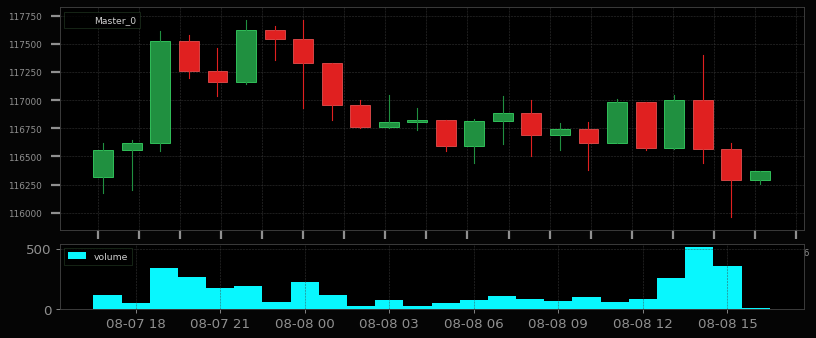

In [20]:
ohlc = ctx.ohlc(ctx.query_instrument("BTCUSD"), "1h").pd()

LookingGlass(
    ohlc,
    {
        "volume": ["bars", ohlc["volume"]],
    },
    backend="mpl",
).look()

## 3.0 Plot the orderbook

In [24]:
symbol = "BTCUSD"
instrument = ctx.query_instrument(symbol)
ob = ctx.get_data(instrument, DataType.ORDERBOOK[0.0, 10])[-1]
ob

[2025-08-08T16:03:17.919000000] 116418.0 (0.0802) | 116419.0 (0.0858)

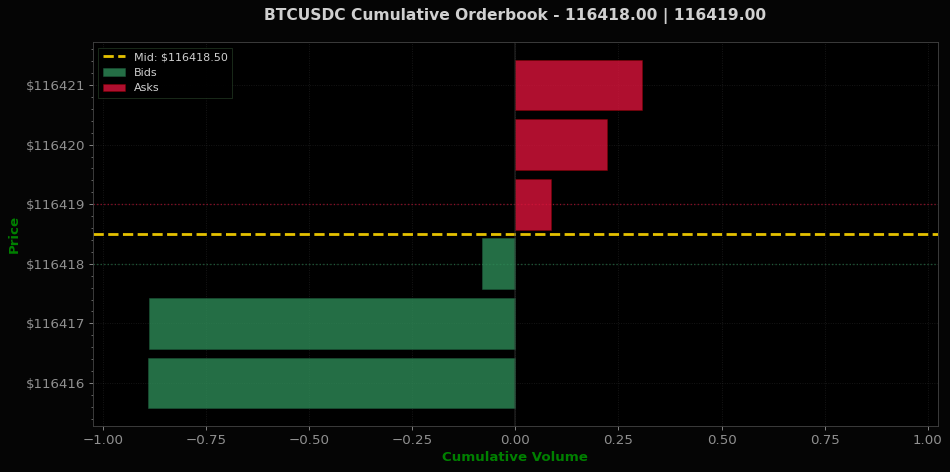

In [25]:
import matplotlib.pyplot as plt
from qubx.utils.charting.orderbook import plot_orderbook, plot_orderbook_depth, plot_orderbook_comparison

# Plot regular orderbook
# fig1, ax1 = plot_orderbook(ob, cumulative=False, max_levels=15, 
#                           title=f"BTCUSDC Orderbook - {ob.top_bid:.2f} | {ob.top_ask:.2f}")
# plt.show()

# Plot cumulative orderbook  
fig2, ax2 = plot_orderbook(ob, cumulative=True, max_levels=10,
                          title=f"BTCUSDC Cumulative Orderbook - {ob.top_bid:.2f} | {ob.top_ask:.2f}",
                          figsize=(12, 6))
plt.show()

# Plot depth chart
# fig3, ax3 = plot_orderbook_depth(ob, max_levels=15,
#                                 title=f"BTCUSDC Depth Chart - {ob.top_bid:.2f} | {ob.top_ask:.2f}")
# plt.show()

## 4.0 Orderbook Time Evolution Comparison

Let's compare how the orderbook has evolved over the last 10 snapshots.

In [26]:
obs = ctx.get_data(instrument, DataType.ORDERBOOK[0.0, 10])[-10:]
len(obs)

10

Comparing 5 orderbook snapshots
Actual timestamps: ['16:03:32.643', '16:03:32.679', '16:03:32.723', '16:03:32.751', '16:03:32.769']
Labels: ['Now', 'Now', 'Now', 'Now', 'Now']


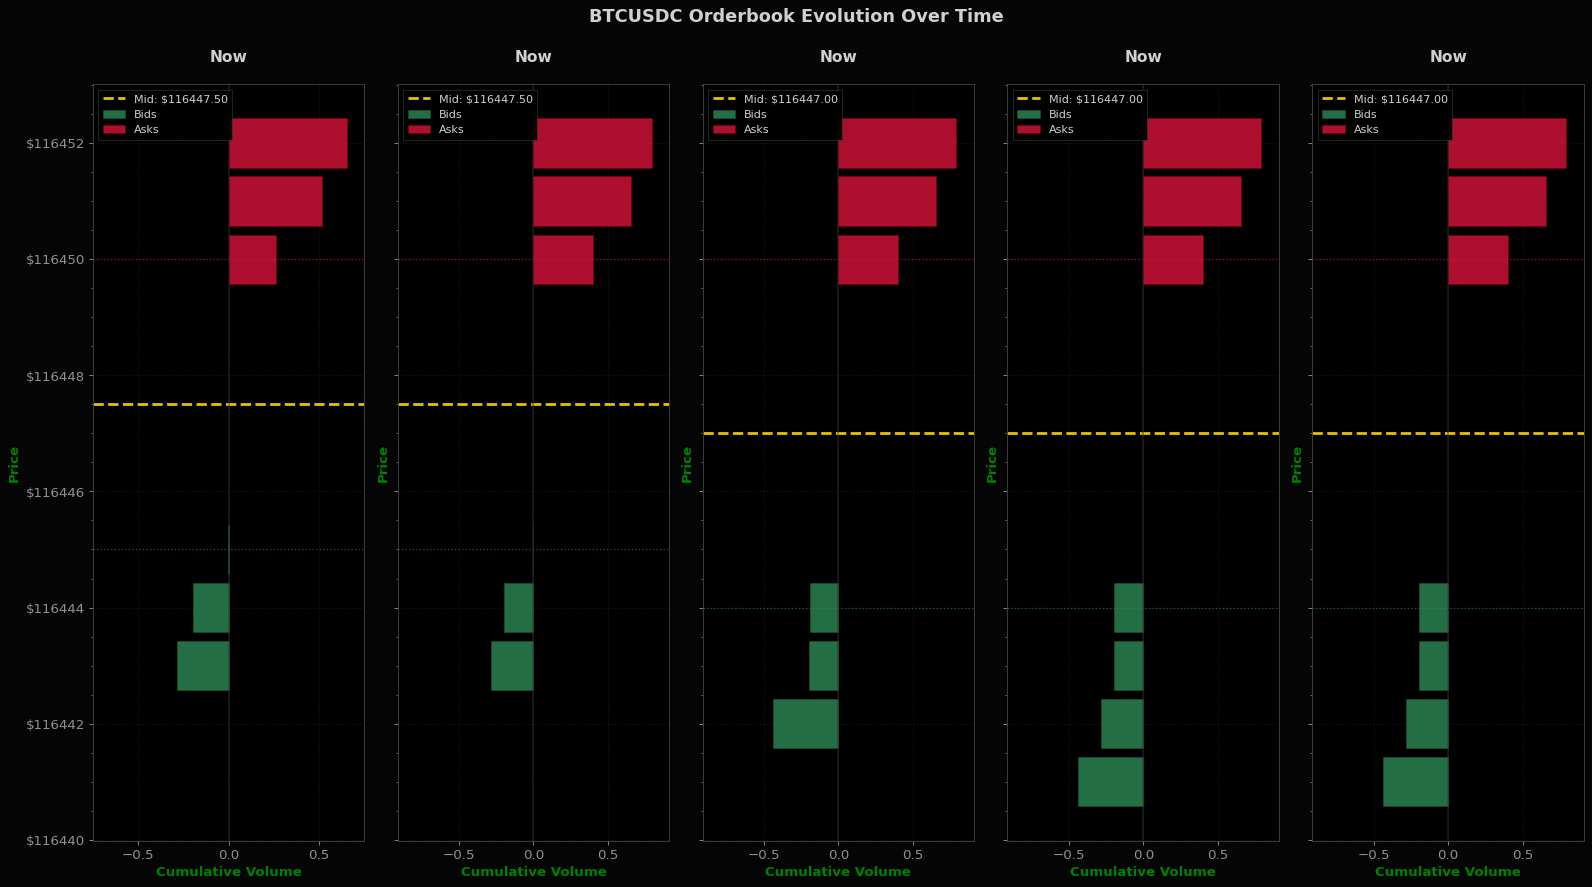

In [27]:
# Compare the evolution of orderbooks over time
# Let's take every 2nd orderbook to avoid overcrowding (5 total)
comparison_obs = obs[::2]  # Take every 2nd orderbook

# Create proper time labels using actual timestamps
timestamps = [pd.Timestamp(ob.time) for ob in comparison_obs]
current_time = pd.Timestamp(obs[-1].time)
labels = []

for ts in timestamps:
    seconds_ago = int((current_time - ts).total_seconds())
    if seconds_ago == 0:
        labels.append("Now")
    elif seconds_ago < 60:
        labels.append(f"T-{seconds_ago}s")
    else:
        minutes_ago = seconds_ago // 60
        labels.append(f"T-{minutes_ago}m{seconds_ago % 60}s")

print(f"Comparing {len(comparison_obs)} orderbook snapshots")
print("Actual timestamps:", [ts.strftime("%H:%M:%S.%f")[:-3] for ts in timestamps])
print("Labels:", labels)

# Create comparison plot
fig, axes = plot_orderbook_comparison(comparison_obs, labels=labels, 
                                    cumulative=True, figsize=(20, 12))
plt.suptitle('BTCUSDC Orderbook Evolution Over Time', fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 5.0 Test aux data

In [ ]:
from qubx.data.readers import AsPandasFrame

data = cast(pd.DataFrame, ctx.get_aux_data(
    "funding_payment",
    exchange="KRAKEN.F",
    symbols=["BTCUSD", "ETHUSD"],
))

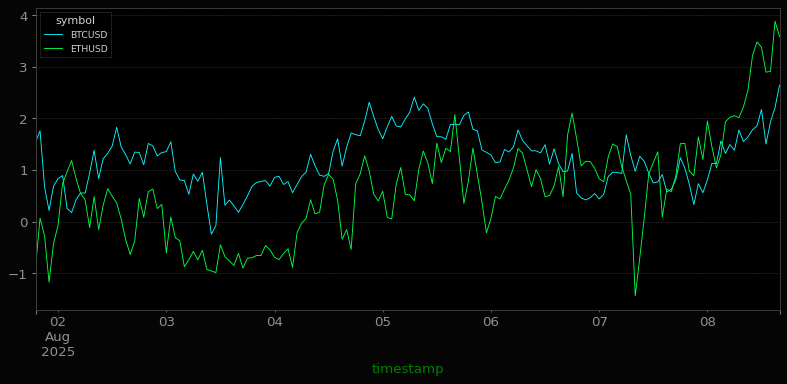

In [40]:
data["funding_rate_apr"] = data["funding_rate"] / data["funding_interval_hours"] * 24 * 365 * 100
data["funding_rate_apr"].unstack(1).plot();

## Stop

In [41]:
ctx.stop()

## Conclusion

Kraken doesn't support watch ohlc (at least not in ccxt) and also watch quotes needs to be reviewed. Watching trades and orderbook works and this is enough for now.